# Tutorial 1: My first accelerator, a FODO cell

# Python libraries 

#### The python universe has a huge number of libraries that extend the capabilities of python. Nearly all of these are open source. The first thing that we need to do is to import the ones that we want to use

In [1]:
#########################################
# Python libraries                      #
#########################################
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

#########################################
# Cpymad library                        #
#########################################
from cpymad.madx import Madx 

#### More on the cpymad library: http://hibtc.github.io/cpymad/getting-started

# Launching MAD-X

In [2]:
madx = Madx()
# In order to see some MAD-X output in jupyter-notebook for some operating sysems the following command is needed:
# madx = Madx(stdout=True)


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2023.05.05               +
  + Execution date: 2024.01.15 12:55:10      +
  ++++++++++++++++++++++++++++++++++++++++++++


#### Note that if MAD-X encounters an error while executing any command, the process will terminate, and you will need to relaunch it

# Questions

#### 1. Define the FODO lattice as described in the statement

In [4]:
madx.call('Tutorial1.madx')

! *********************************************************************

! Definition of parameters

! *********************************************************************



l_cell=100;

++++++ info: l_cell redefined
quadrupolelength=5;

++++++ info: quadrupolelength redefined
f=200;

++++++ info: f redefined
myk:=1/f/quadrupolelength;

++++++ info: myk redefined


! *********************************************************************

! Definition of magnets

! ********************************************************************* 



qf: quadrupole, l=quadrupolelength, k1:=myk;

++++++ info: element redefined: qf
qd: quadrupole, l=quadrupolelength, k1:=-myk;

++++++ info: element redefined: qd




! *********************************************************************

! Definition of sequence

! *********************************************************************



myCell:sequence, refer=entry, l=l_cell;

quadrupole1: qf, at=0;

++++++ warning: implicit element re-definition ign

#### Then, we define a proton beam, activate the sequence and compute the linear optics functions

In [6]:
myString='''

! *********************************************************************
! Definition of beam
! *********************************************************************

beam, particle=proton, energy=2;

! *********************************************************************
! Use of the sequence
! *********************************************************************

use, sequence=myCell;

! *********************************************************************
! TWISS
! *********************************************************************

select, flag=twiss, column=name, keyword,s,betx,alfx,mux,bety,alfy,muy;

twiss, file=MyfirstFODO.txt;

'''

In [7]:
madx.input(myString)

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
     0.03853349451     -0.04384718845        463.6232883                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0      0.03853349451 

               dq2            betymax              dymax              dyrms 
    -0.04384718845        463.6232883                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            

True

#### In the following, we are going to see how to access the MAD-X output data with python-cpymad functions and plot results with the matplotlib library

#### First we can check the list of existing output table names

In [8]:
print(list(madx.table))

['summ', 'twiss']


#### And save the data in a pandas dataframe 

In [9]:
myDF=madx.table.twiss.dframe()

In [10]:
myDF

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1
#s,mycell$start:1,marker,0.0,463.623288,-1.156109,0.000000,369.779162,0.929316,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
quadrupole1,quadrupole1:1,quadrupole,5.0,463.623288,1.156109,0.001709,369.779162,-0.929316,0.002161,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,25.0,419.394867,1.055312,0.008930,408.967742,-1.030113,0.010350,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
marker1,marker1:1,marker,25.0,419.394867,1.055312,0.008930,408.967742,-1.030113,0.010350,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,50.0,369.779162,0.929316,0.019041,463.623288,-1.156109,0.019493,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
quadrupole2,quadrupole2:1,quadrupole,55.0,369.779162,-0.929316,0.021202,463.623288,1.156109,0.021202,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_2[0],drift_2:0,drift,75.0,408.967742,-1.030113,0.029391,419.394867,1.055312,0.028423,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
marker2,marker2:1,marker,75.0,408.967742,-1.030113,0.029391,419.394867,1.055312,0.028423,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_3[0],drift_3:0,drift,100.0,463.623288,-1.156109,0.038533,369.779162,0.929316,0.038533,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#e,mycell$end:1,marker,100.0,463.623288,-1.156109,0.038533,369.779162,0.929316,0.038533,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### We can select the data of interest as follows:

In [11]:
myDF[['name','keyword','s','betx','bety','alfx','alfy','mux','muy','dx','dy','x','y']]

,name,keyword,s,betx,bety,alfx,alfy,mux,muy,dx,dy,x,y
#s,mycell$start:1,marker,0.0,463.623288,369.779162,-1.156109,0.929316,0.000000,0.000000,0.0,0.0,0.0,0.0
quadrupole1,quadrupole1:1,quadrupole,5.0,463.623288,369.779162,1.156109,-0.929316,0.001709,0.002161,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,25.0,419.394867,408.967742,1.055312,-1.030113,0.008930,0.010350,0.0,0.0,0.0,0.0
marker1,marker1:1,marker,25.0,419.394867,408.967742,1.055312,-1.030113,0.008930,0.010350,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,50.0,369.779162,463.623288,0.929316,-1.156109,0.019041,0.019493,0.0,0.0,0.0,0.0
quadrupole2,quadrupole2:1,quadrupole,55.0,369.779162,463.623288,-0.929316,1.156109,0.021202,0.021202,0.0,0.0,0.0,0.0
drift_2[0],drift_2:0,drift,75.0,408.967742,419.394867,-1.030113,1.055312,0.029391,0.028423,0.0,0.0,0.0,0.0
marker2,marker2:1,marker,75.0,408.967742,419.394867,-1.030113,1.055312,0.029391,0.028423,0.0,0.0,0.0,0.0
drift_3[0],drift_3:0,drift,100.0,463.623288,369.779162,-1.156109,0.929316,0.038533,0.038533,0.0,0.0,0.0,0.0
#e,mycell$end:1,marker,100.0,463.623288,369.779162,-1.156109,0.929316,0.038533,0.038533,0.0,0.0,0.0,0.0


#### And for the summ table:

In [12]:
myDF_summ=madx.table.summ.dframe()
myDF_summ

,length,orbit5,alfa,gammatr,q1,dq1,betxmax,dxmax,dxrms,xcomax,...,synch_1,synch_2,synch_3,synch_4,synch_5,synch_6,synch_8,nflips,dqmin,dqmin_phase
#e,100.0,-0.0,0.0,0.0,0.038533,-0.043847,463.623288,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.770648


#### Some examples to print some desired values from the output tables are given below

#### Example 1:

In [13]:
print("Horizontal beta_max: %s" %myDF_summ["betxmax"].values[0])
print("Vertical beta_max: %s" %myDF_summ["betymax"].values[0])

Horizontal beta_max: 463.62328830783895
Vertical beta_max: 463.6232883078387


#### Example 2:

In [120]:
print ("Showing only the column with the horizontal beta-function data:")

display(myDF["betx"].values)

print ("Showing only the horizontal beta-function at the start of the FODO cell:")

display(myDF["betx"].values[0])

Showing only the column with the horizontal beta-function data:


array([467.7298984 , 467.7298984 , 423.53285649, 423.53285649,
       373.89942109, 373.89942109, 413.1072479 , 413.1072479 ,
       467.7298984 , 467.7298984 ])

Showing only the horizontal beta-function at the start of the FODO cell:


467.7298984029031

In [14]:
betxmax=max(myDF["betx"])
print("Horizontal betamax")
print(betxmax)

betymax=max(myDF["bety"])
print("Vertical betamax")
print(betymax)

Horizontal betamax
463.62328830783895
Vertical betamax
463.6232883078387


#### Next, two examples on how to plot data from the created pandas dataframes are shown

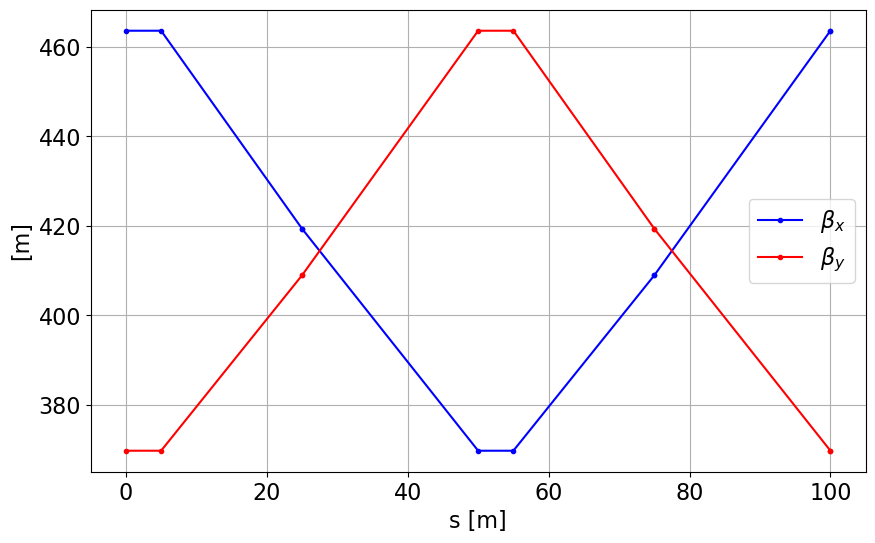

In [15]:
fig = plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 16})
plt.plot(myDF['s'],myDF['betx'],'.-b',label='$\\beta_x$')
plt.plot(myDF['s'],myDF['bety'],'.-r',label='$\\beta_y$')
plt.xlabel('s [m]')
plt.ylabel('[m]')
plt.legend(loc='best')
plt.grid()

#### Here, we present an example of how to add on the top of the optics plot the magnetic lattice of the cell
    - In order to do that, the lib_JUAS2024 library has to be loaded

/Users/nuria/Desktop/JUAS2024/Tutorial1/../lib_JUAS2024.py:68: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax2.set_ylim(-np.max(abs(myDF.angle)),np.max(abs(myDF.angle)))


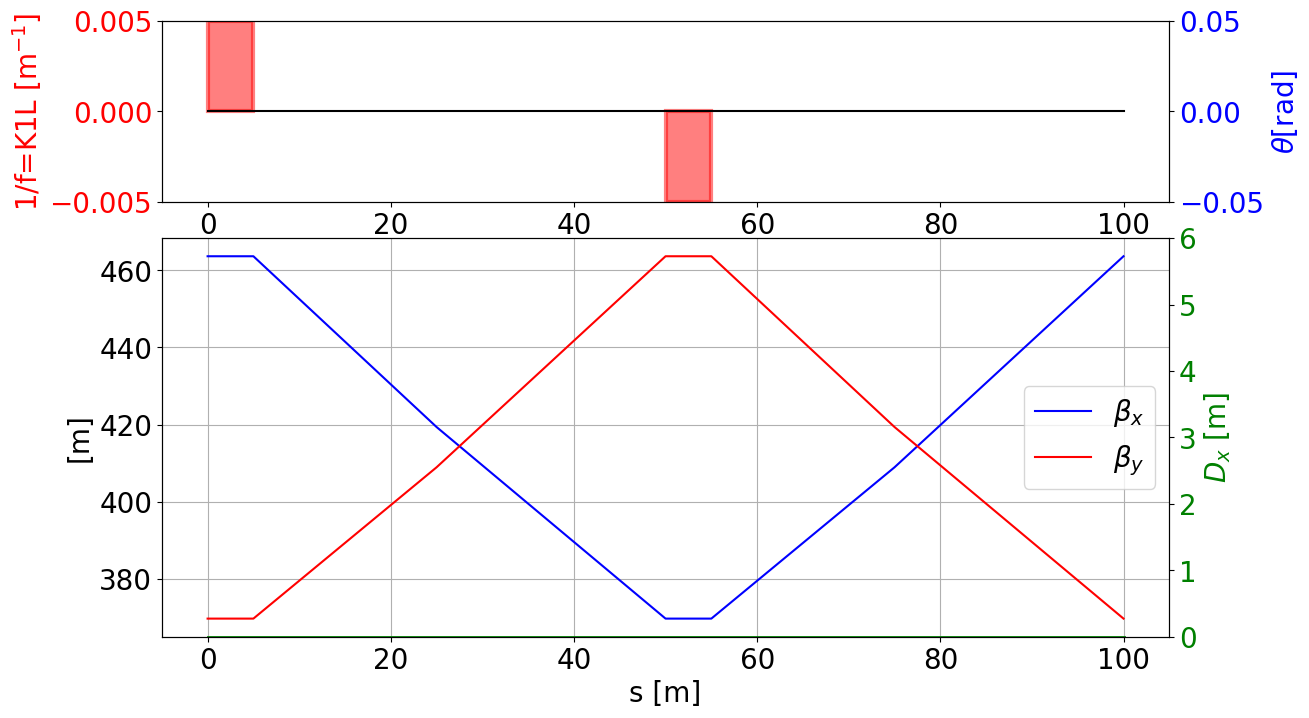

In [16]:
import sys
sys.path.append('../')
import lib_JUAS2024 as lib
lib.plot_layout(myDF)

#### 3. Using the $\beta$-function plot obtained, can you estimate the phase advance of the cell? How does this value compare to the tune computed by MAD-X.

#### For the phase advance one can consider the definition:

 $$\begin{equation} 
 \Delta \mu (s)=\int\frac{1}{\beta(s)}ds.
 \end{equation}$$

#### Remember the phase advance in MAD-X is given in units of [2$\pi$].

#### 4. Try with $E_{tot}$ = 0.7 GeV: what is the MAD-X error message? Try with f = 20 m: what is the MAD-X error message? 

#### (Note that the error messages, will appear in the jupyter-notebook or in the terminal from which you launched the JupyterLab). 